In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Variables:
'''natural logarithm of their weeklyearnings (lwklywge).'''

'''Using a density histogram or kernel density estimation (your choice) summarize
the behavior of variable weekly pay (wage) included in the sample. Find the
sample mean, sample median, and coefficient of skewness for wage. Given your
graph, are the values of the sample mean and sample median as expected? And
the coefficient of skewness? Comment.'''

# Import  data
path = os.getcwd()
df = pd.read_csv(path+"/Assig1.csv")

# Review Dataset

In [3]:
df.head()

,lwklywge,educ
0,5.790019,12
1,5.952494,11
2,5.315949,12
3,5.595926,12
4,6.068915,12


In [4]:
df['w_wages'] = np.exp(df['lwklywge'])

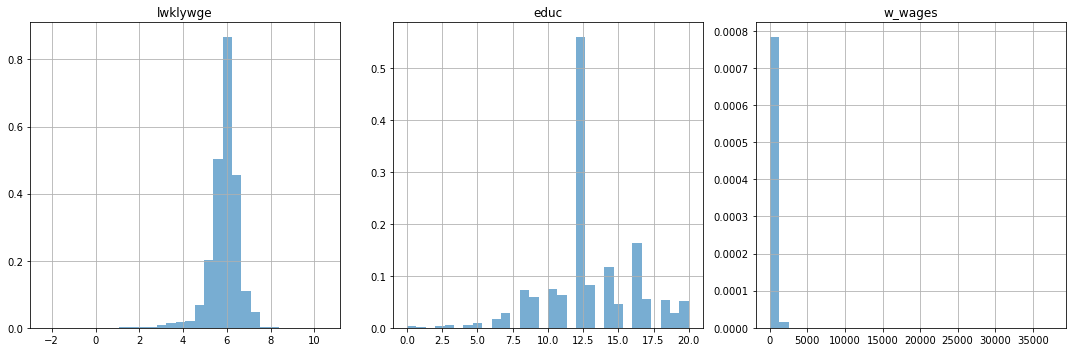

In [5]:
## Plot both density plots for weekly averages with and without log transformation
fig, axes = plt.subplots(1,3)

for i, el in enumerate(list(df.columns.values)):
    a= df.hist(el,ax=axes.flatten()[i],bins=30, density=True, alpha=0.6)

fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()



In [6]:
## Create a summary statistics
def sample_dict(dataset):
    statistics = {}

    for i in dataset.columns:
        size = np.size(dataset[i])
        datatype = dataset[i].dtypes
        unique_values = dataset[i].unique().size
        mean = np.mean(dataset[i])
        stdv = np.std(dataset[i])
        min = dataset[i].min()
        per25 = dataset[i].quantile(0.25)
        median = dataset[i].quantile(0.50)
        per75 = dataset[i].quantile(0.75)
        max = dataset[i].max()
        IQRs = dataset[i].quantile(0.75) - dataset[i].quantile(0.25)
        lower_bound = (dataset[i].quantile(0.25)) - 1.5*(dataset[i].quantile(0.75) - dataset[i].quantile(0.25))
        upper_bound = (dataset[i].quantile(0.75)) + 1.5*(dataset[i].quantile(0.75) - dataset[i].quantile(0.25))

        statistics[i] = (size,datatype,unique_values,mean,stdv,min,per25,median,per75,max,IQRs,lower_bound,upper_bound)
    results = pd.DataFrame.from_dict(statistics,orient='index',columns=['size','datatype','unique_values','mean','stdv','min','per25',
                                                                        'median','per75','max','IQRs','lower_bound','upper_bound'])
    results['lower_bound'] = np.where((results['lower_bound']<0) & (results['min']>=0),0,results['lower_bound'])
    results =  round(results,2)
    results = results.to_dict('index')
    return results


In [17]:
# Generate summry
df_diction = sample_dict(df)
pd.DataFrame(df_diction).T


,size,datatype,unique_values,mean,stdv,min,per25,median,per75,max,IQRs,lower_bound,upper_bound
lwklywge,329509,float64,26732,5.9,0.68,-2.34,5.64,5.95,6.26,10.53,0.62,4.71,7.19
educ,329509,int64,21,12.77,3.28,0.0,12.0,12.0,15.0,20.0,3.0,7.5,19.5
w_wages,329509,float64,26732,439.47,364.94,0.1,280.48,384.71,521.85,37500.14,241.37,0.0,883.9


In [8]:
# Calculate the number of outliers for each column
def outlier_summary(dataset,dictionary,lower,upper):
    outli = {}
    for i in dataset.columns:
        n = np.size(dataset[i])
        lower_b = round(dictionary[i][lower],3)
        outliers_lower_n = dataset[i][dataset[i] < dictionary[i][lower]].count()
        outliers_lower_perc = (dataset[i][dataset[i] < dictionary[i][lower]].count()) / np.size(dataset[i])
        upper_b = round(dictionary[i][upper],3)
        outliers_upper_n = dataset[i][dataset[i] > dictionary[i][upper]].count()
        outliers_upper_perc = (dataset[i][dataset[i] > dictionary[i][upper]].count()) / np.size(dataset[i])
        total_outliers = outliers_lower_n + outliers_upper_n
        total_outliers_perc = outliers_lower_perc + outliers_upper_perc

        outli[i] = (n,lower_b,outliers_lower_n,outliers_lower_perc,upper_b,outliers_upper_n,outliers_upper_perc,total_outliers,total_outliers_perc)
    results = pd.DataFrame.from_dict(outli,orient='index',columns=['n','lower_b','outliers_lower_n','outliers_lower_perc','upper_b','outliers_upper_n',
                                                                   'outliers_upper_perc','total_outliers','total_outliers_perc'])
    return round(results,2)


In [9]:
outlier_summary(df,df_diction,'lower_bound','upper_bound').T


,lwklywge,educ,w_wages
n,329509.00,329509.00,329509.00
lower_b,4.71,7.50,0.00
outliers_lower_n,12826.00,15907.00,0.00
outliers_lower_perc,0.04,0.05,0.00
upper_b,7.19,19.50,883.90
outliers_upper_n,6261.00,11480.00,17075.00
outliers_upper_perc,0.02,0.03,0.05
total_outliers,19087.00,27387.00,17075.00
total_outliers_perc,0.06,0.08,0.05


In [10]:
## Summarize behaviour using: mean, median and skewness coefficients
# Calculate 4 moments of a distribution
def moment_summary(dataset):
    statistics = {}

    for i in dataset.columns:
        mean= np.mean(dataset[i])
        median = dataset[i].quantile(0.50)
        stdv = np.std(dataset[i])
        skewness = 3*(mean - median) / stdv
        mu4 = np.mean((dataset[i] - mean)**4)
        mu2 = np.mean((dataset[i] - mean)**2)
        kurtosis = mu4/(mu2**2)
        Excess_kurtosis = kurtosis - 3

        statistics[i] = (mean,median,stdv,skewness,kurtosis,Excess_kurtosis)
    results = pd.DataFrame.from_dict(statistics,orient='index',columns=['mean','median','stdv','skewness','kurtosis','Excess_kurtosis'])
    results = round(results,2)
    #Measuring Skewness
    results['is_skewed'] = results['skewness']
    results['is_skewed'] = np.where((results['skewness']> -0.5) & (results['skewness']< 0), "moderate negative skewness", results['is_skewed'])
    results['is_skewed'] = np.where((results['skewness']<= -0.5), "highly negative skewness", results['is_skewed'])
    results['is_skewed'] = np.where((results['skewness']> 0) & (results['skewness']< 0.5), "moderate positive skewness", results['is_skewed'])
    results['is_skewed'] = np.where((results['skewness']>= 0.5) , "high positive skewness", results['is_skewed'])
    results['is_skewed'] = np.where((results['skewness']== 0) , "symmetric", results['is_skewed'])

    #Measuring Kurtosis
    results['is_kurtosis'] = results['kurtosis']
    results['is_kurtosis'] = np.where((results['kurtosis']== 3) & (results['Excess_kurtosis']== 0), "mesokurtic", results['is_kurtosis'])
    results['is_kurtosis'] = np.where((results['kurtosis']< 3) & (results['Excess_kurtosis']< 0), "platykurtic", results['is_kurtosis'])
    results['is_kurtosis'] = np.where((results['kurtosis']> 3) & (results['Excess_kurtosis']> 0), "leptokurtic", results['is_kurtosis'])

    #Kurtosis description
    results['description'] = results['is_kurtosis']
    results['description'] = np.where((results['is_kurtosis']== "mesokurtic") , "extreme events are close to zero", results['description'])
    results['description'] = np.where((results['is_kurtosis']=="platykurtic") , "few values in the tails, flatter peak", results['description'])
    results['description'] = np.where((results['is_kurtosis']=="leptokurtic") , "more peaked than a normal distribution with longer tails", results['description'])

    return results


In [15]:
# Print results:
summary_moments = pd.DataFrame(moment_summary(df[['lwklywge','w_wages']]))


'''Given your graph, are the values of the sample mean and sample median as expected? And
   the coefficient of skewness? Comment.'''

'''wages /removed log tranformation : The distribution of wages were expected to be positively skewed, more peaked than a normal 
   distribution with a very long tail showing cases of extreme outliers. We expected this result given the disparity of wages in
   the labour market. In our sample we can observe that the IQR is between 280 and 521, meaning that our sample is mostly represented
   between this bounds. Moreover, we can see that the upper bound can stretch up to 883, meaning that any wage higher will be considered
   outliers. In this case we've approximated that around 5% of our observations have a higher wage than 883 being its maximum 37,500. 
  
   The first thing to notice is the difference between the mean and the median that proves the existence of outliers that
   increase the average value of wages. The second point would be a large devation that indicate that observations can be 
   very far from the actual mean (std 364). Finally we measured the actual skewness for wages which gave us a result of
   0.45, meaning that there's a positive skewness to the right.'''


## Homework
summary_moments.T

,lwklywge,w_wages
mean,5.9,439.47
median,5.95,384.71
stdv,0.68,364.94
skewness,-0.23,0.45
kurtosis,16.4,1773.78
Excess_kurtosis,13.4,1770.78
is_skewed,moderate negative skewness,moderate positive skewness
is_kurtosis,leptokurtic,leptokurtic
description,more peaked than a normal distribution with lo...,more peaked than a normal distribution with lo...


In [12]:
# Question 1. C
'''Provide an estimate of average weekly pay for people with 12 years of education.
This statistic would be an estimate of which parameter?'''

'Provide an estimate of average weekly pay for people with 12 years of education.\nThis statistic would be an estimate of which parameter?'